In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading data set
advertising=pd.read_csv('Advertising.csv')

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [4]:
#droping unamed cloumn
advertising=advertising.drop('Unnamed: 0',axis=1)

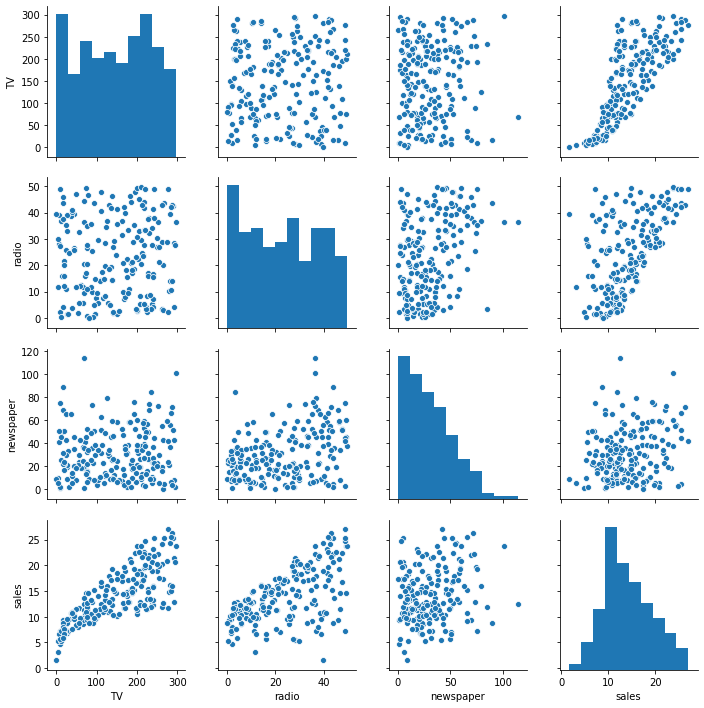

In [8]:
#ploting pairplot
sns.pairplot(advertising)

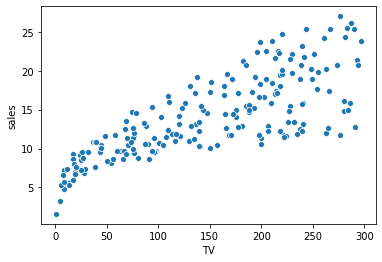

In [9]:
#ploting scatterplot
sns.scatterplot(advertising['TV'],advertising['sales']);

# correaltion matrix

In [10]:
ad=advertising.corr()
ad.style.background_gradient(cmap='summer')

,TV,radio,newspaper,sales
TV,1,0.0548087,0.0566479,0.782224
radio,0.0548087,1,0.354104,0.576223
newspaper,0.0566479,0.354104,1,0.228299
sales,0.782224,0.576223,0.228299,1


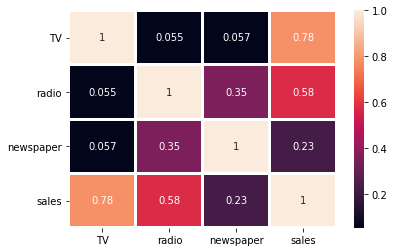

In [11]:
#plotting heatmap
sns.heatmap(ad,annot=True,linewidths=2)

# importing linear regression model from statsmodel

In [12]:
#import model 
import statsmodels.api as sm

In [13]:
#loading dependent and independent variables
x=advertising['TV']# independent variables
y=advertising['sales']# dependent variables

In [14]:
# adding constant to the model
x=sm.add_constant(x)

G:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [15]:
# generating equation on training data
model1=sm.OLS(y,x).fit()

In [16]:
model1

In [17]:
# predicting on the test data forverification purpouse
ypred=model1.predict(x)

In [18]:
#model details
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 27 Dec 2019   Prob (F-statistic):           1.47e-42
Time:                        20:18:51   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# checking model parameters
model1.params

const    7.032594
TV       0.047537
dtype: float64

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-2.57344777, -2.09477347, -1.61609916, -1.13742486, -0.65875056,
        -0.18007626,  0.29859804,  0.77727235,  1.25594665,  1.73462095,
         2.21329525]),
 <a list of 10 Patch objects>)

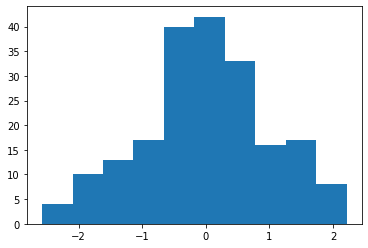

In [20]:

plt.hist(model1.resid_pearson)

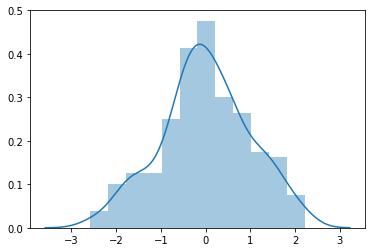

In [21]:
sns.distplot(model1.resid_pearson)

1 task missing

 # using scikit-leran library importing linnear regression model

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [23]:
lm=LinearRegression()

In [24]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
b0=lm.intercept_
b1=lm.coef_[1]

In [26]:
print(b0,b1)

7.032593549127696 0.04753664043301974


In [27]:
ypre=lm.predict(x)

# using stats model multi linearegression

In [43]:
# loading dependent and independent variables
fe=['TV','newspaper']# inputing two independent feauters
x=advertising[fe]# independent variables
y=advertising['sales']# dependent variables

In [44]:
x=sm.add_constant(x)# adding constant
model2=sm.OLS(y,x).fit()# fitting model and generaing equation on train data
ypre=model2.predict(x)#predicting on the test data

In [45]:
# model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 15 Oct 2019   Prob (F-statistic):           1.58e-96
Time:                        10:06:13   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# bulding model on 3 independent feauters and one dependent feauters
fe=['TV','radio','newspaper']# independent feauters names
x=advertising[fe]#loading independent feauters 
y=advertising['sales']# loading dependent feauters
x=sm.add_constant(x)# adding constant to the model
model3=sm.OLS(y,x).fit()#fitting model with the train data
ypre=model3.predict(x)# predicting on x
model3.summary()# printing model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 15 Oct 2019   Prob (F-statistic):           1.58e-96
Time:                        10:14:10   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
#printing each model metrics for best model selection
evlm=['AIC','BIC','R-squared','Adj.R-squared','RMSE','VIF']

In [55]:
model1_met=[model1.aic,model1.bic,model1.rsquared,model1.rsquared_adj,np.sqrt(model1.mse_resid),1/(1-model1.rsquared)]

In [56]:
#model1 metrics
model1_met

[1042.0913275363478,
 1048.687962269444,
 0.611875050850071,
 0.6099148238341623,
 3.2586563686504624,
 2.5764898705692567]

In [57]:
model2_met=[model2.aic,model2.bic,model2.rsquared,model2.rsquared_adj,np.sqrt(model2.mse_resid),1/(1-model2.rsquared)]

In [58]:
#model2 metrics
model2_met

[780.3622358887662,
 793.5555053549584,
 0.8972106381789521,
 0.8956373316204667,
 1.6855103734147445,
 9.728633219271845]

In [69]:
# converting each model metrics to data frame
i=pd.DataFrame(zip(evlm,model1_met,model2_met))

In [71]:
# adding coloumn names
i.columns=['metrics','model1','model2']

In [72]:
# printing model metrics in dataframe format
i

,metrics,model1,model2
0,AIC,1042.091328,780.362236
1,BIC,1048.687962,793.555505
2,R-squared,0.611875,0.897211
3,Adj.R-squared,0.609915,0.895637
4,RMSE,3.258656,1.685510
5,VIF,2.576490,9.728633
